# Datos de un call center

Te han contratado para determinar cual ha sido el impacto de la renuncia de empleados en una empresa donde tiene varias sedes donde realizan servicios de call center.

Identificar las llamadas entrates respectos a las llamadas contestadas

In [70]:
# Se puede utilizar ! o % para descargar los paquetes
%pip install matplotlib
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Extraer el documento de csv

In [72]:
df = pd.read_csv('C:/Users/HP/Documents/proyecto-call-center/call-center-data.csv', delimiter=';')
df.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Date
0,1,217,204,"94,01",13,0:00:17,0:02:14,0:02:45,"76,28",44927
1,2,200,182,91,18,0:00:20,0:02:22,0:06:55,"72,73",44927
2,3,216,198,"91,67",18,0:00:18,0:02:38,0:03:50,"74,3",44927
3,4,155,145,"93,55",10,0:00:15,0:02:29,0:03:12,"79,61",44927
4,5,37,37,100,0,0:00:03,0:02:06,0:00:35,"97,3",44927


### Obtener el tipo de datos de la columna

In [73]:
df.dtypes

Index                          int64
Incoming Calls                 int64
Answered Calls                 int64
Answer Rate                   object
Abandoned Calls                int64
Answer Speed (AVG)            object
Talk Duration (AVG)           object
Waiting Time (AVG)            object
Service Level (20 Seconds)    object
Date                           int64
dtype: object

### Cambiar el tipo de dato en Fecha a Date

In [74]:
# La fecha de origin se utiliza ya que los datos provienen de excel
# D convierte los números en días a partir de la fecha base.
df["Date"] = pd.to_datetime(df["Date"], origin='1899-12-30', unit='D')

print(df.dtypes)

Index                                  int64
Incoming Calls                         int64
Answered Calls                         int64
Answer Rate                           object
Abandoned Calls                        int64
Answer Speed (AVG)                    object
Talk Duration (AVG)                   object
Waiting Time (AVG)                    object
Service Level (20 Seconds)            object
Date                          datetime64[ns]
dtype: object


In [75]:
df.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Date
0,1,217,204,"94,01",13,0:00:17,0:02:14,0:02:45,"76,28",2023-01-01
1,2,200,182,91,18,0:00:20,0:02:22,0:06:55,"72,73",2023-01-01
2,3,216,198,"91,67",18,0:00:18,0:02:38,0:03:50,"74,3",2023-01-01
3,4,155,145,"93,55",10,0:00:15,0:02:29,0:03:12,"79,61",2023-01-01
4,5,37,37,100,0,0:00:03,0:02:06,0:00:35,"97,3",2023-01-01


### Verificar valores nulos

In [76]:
df.isnull().sum()

Index                         0
Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
Date                          0
dtype: int64

### Grafico sin Storytelling

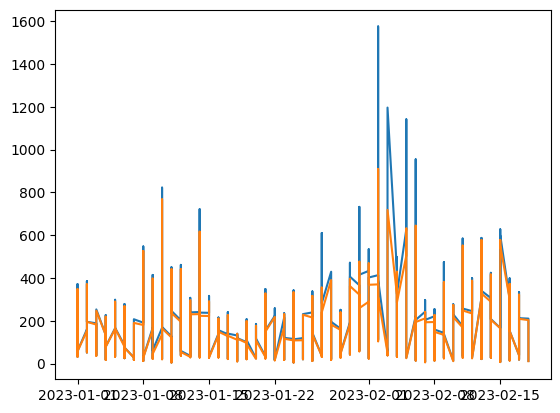

In [77]:
plt.figure()
# Llamadas entrantes
plt.plot(df['Date'], df['Incoming Calls'])
# Llamadas atendidas
plt.plot(df['Date'], df['Answered Calls'])

### Grafica con Storytelling

C:\Users\HP\AppData\Local\Temp\ipykernel_6580\1694309575.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_weekly.index[i], df_weekly['Incoming Calls'][i] + 3200,  # Sube las etiquetas
C:\Users\HP\AppData\Local\Temp\ipykernel_6580\1694309575.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(df_weekly['Incoming Calls'][i]), color='grey', fontsize=11, ha='center')
C:\Users\HP\AppData\Local\Temp\ipykernel_6580\1694309575.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

Text(0.1, -0.1, 'Se recomienda ver que es lo que paso ya que el personal tuvo que trabajar el doble')

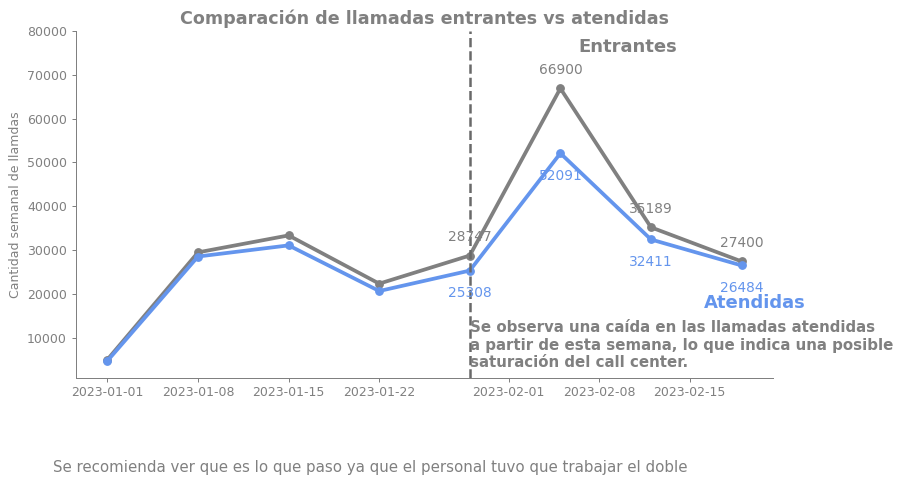

In [78]:
# Agrupar por semanas
df_weekly = df.resample('W', on='Date').sum()
plt.figure(figsize=(10, 5), dpi=90)
# Llamadas entrantes
plt.plot(
	df_weekly.index,
	df_weekly['Incoming Calls'],
	lw = 3,
     color = 'grey',
	marker = 'o')
# Llamadas atendidas
plt.plot(
    df_weekly.index, 
    df_weekly['Answered Calls'],
    lw = 3,
    color = 'cornflowerblue',
    marker = 'o')

fecha_referencia = df_weekly.index[4]
plt.axvline(x=fecha_referencia, linewidth=2, ls='--', color='dimgrey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().tick_params(colors='0.5', grid_color='grey')

plt.text(0.72, 0.94, 'Entrantes', transform=plt.gca().transAxes, color='gray', fontsize='x-large', fontweight = 'bold')
plt.text(0.90, 0.20, 'Atendidas', transform=plt.gca().transAxes, color='cornflowerblue', fontsize='x-large', fontweight = 'bold')

# Agregar titulos
plt.ylabel('Cantidad semanal de llamdas', color='grey')
plt.title('Comparación de llamadas entrantes vs atendidas', color='grey', size=14, fontweight='bold')

# Agregar etiquetas al gráfico a partir de la linea
for i in range(len(df_weekly)):
	if df_weekly.index[i] >= fecha_referencia:
		# Ajustar la posición de las etiquetas sumando/restando un valor
		plt.text(df_weekly.index[i], df_weekly['Incoming Calls'][i] + 3200,  # Sube las etiquetas
		str(df_weekly['Incoming Calls'][i]), color='grey', fontsize=11, ha='center')
		plt.text(df_weekly.index[i], df_weekly['Answered Calls'][i] - 6000,  # Baja las etiquetas
		str(df_weekly['Answered Calls'][i]), color='cornflowerblue', fontsize=11, ha='center')

plt.ylim(900, 80000)

plt.annotate(
    'Se observa una caída en las llamadas atendidas\na partir de esta semana, lo que indica una posible\nsaturación del call center.',
    xy=(fecha_referencia, df_weekly['Answered Calls'][4]),  
    xytext=(fecha_referencia, df_weekly['Answered Calls'][4] - 22000),
    fontsize=12, color='gray', fontweight='bold'
)

plt.figtext(
    0.1, -0.1,
    "Se recomienda ver que es lo que paso ya que el personal tuvo que trabajar el doble",
    wrap=True, fontsize=12, color='grey'
)
